In [1]:
#Decision Tree classifier on Pima Indian Diabetes
#Import Pandas library & the decision tree module from sklearn & train, test split module from sklearn
# Source data: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Load data set
#Since the csv does not have column names, assign them names as below. Print to see the table
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"pima-indians-diabetes.csv", header = None, names = col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

In [3]:
#Split dataset into features & target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
#Divide the data into 70% training data and 30% testing data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#Train the data with decision tree classifier module of sklearn
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [5]:
#Make prediction
y_pred = clf.predict(X_test)

In [6]:
#get the accuracy score, confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[113  33]
 [ 46  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       146
           1       0.54      0.46      0.50        85

    accuracy                           0.66       231
   macro avg       0.63      0.62      0.62       231
weighted avg       0.65      0.66      0.65       231

Accuracy: 0.658008658008658


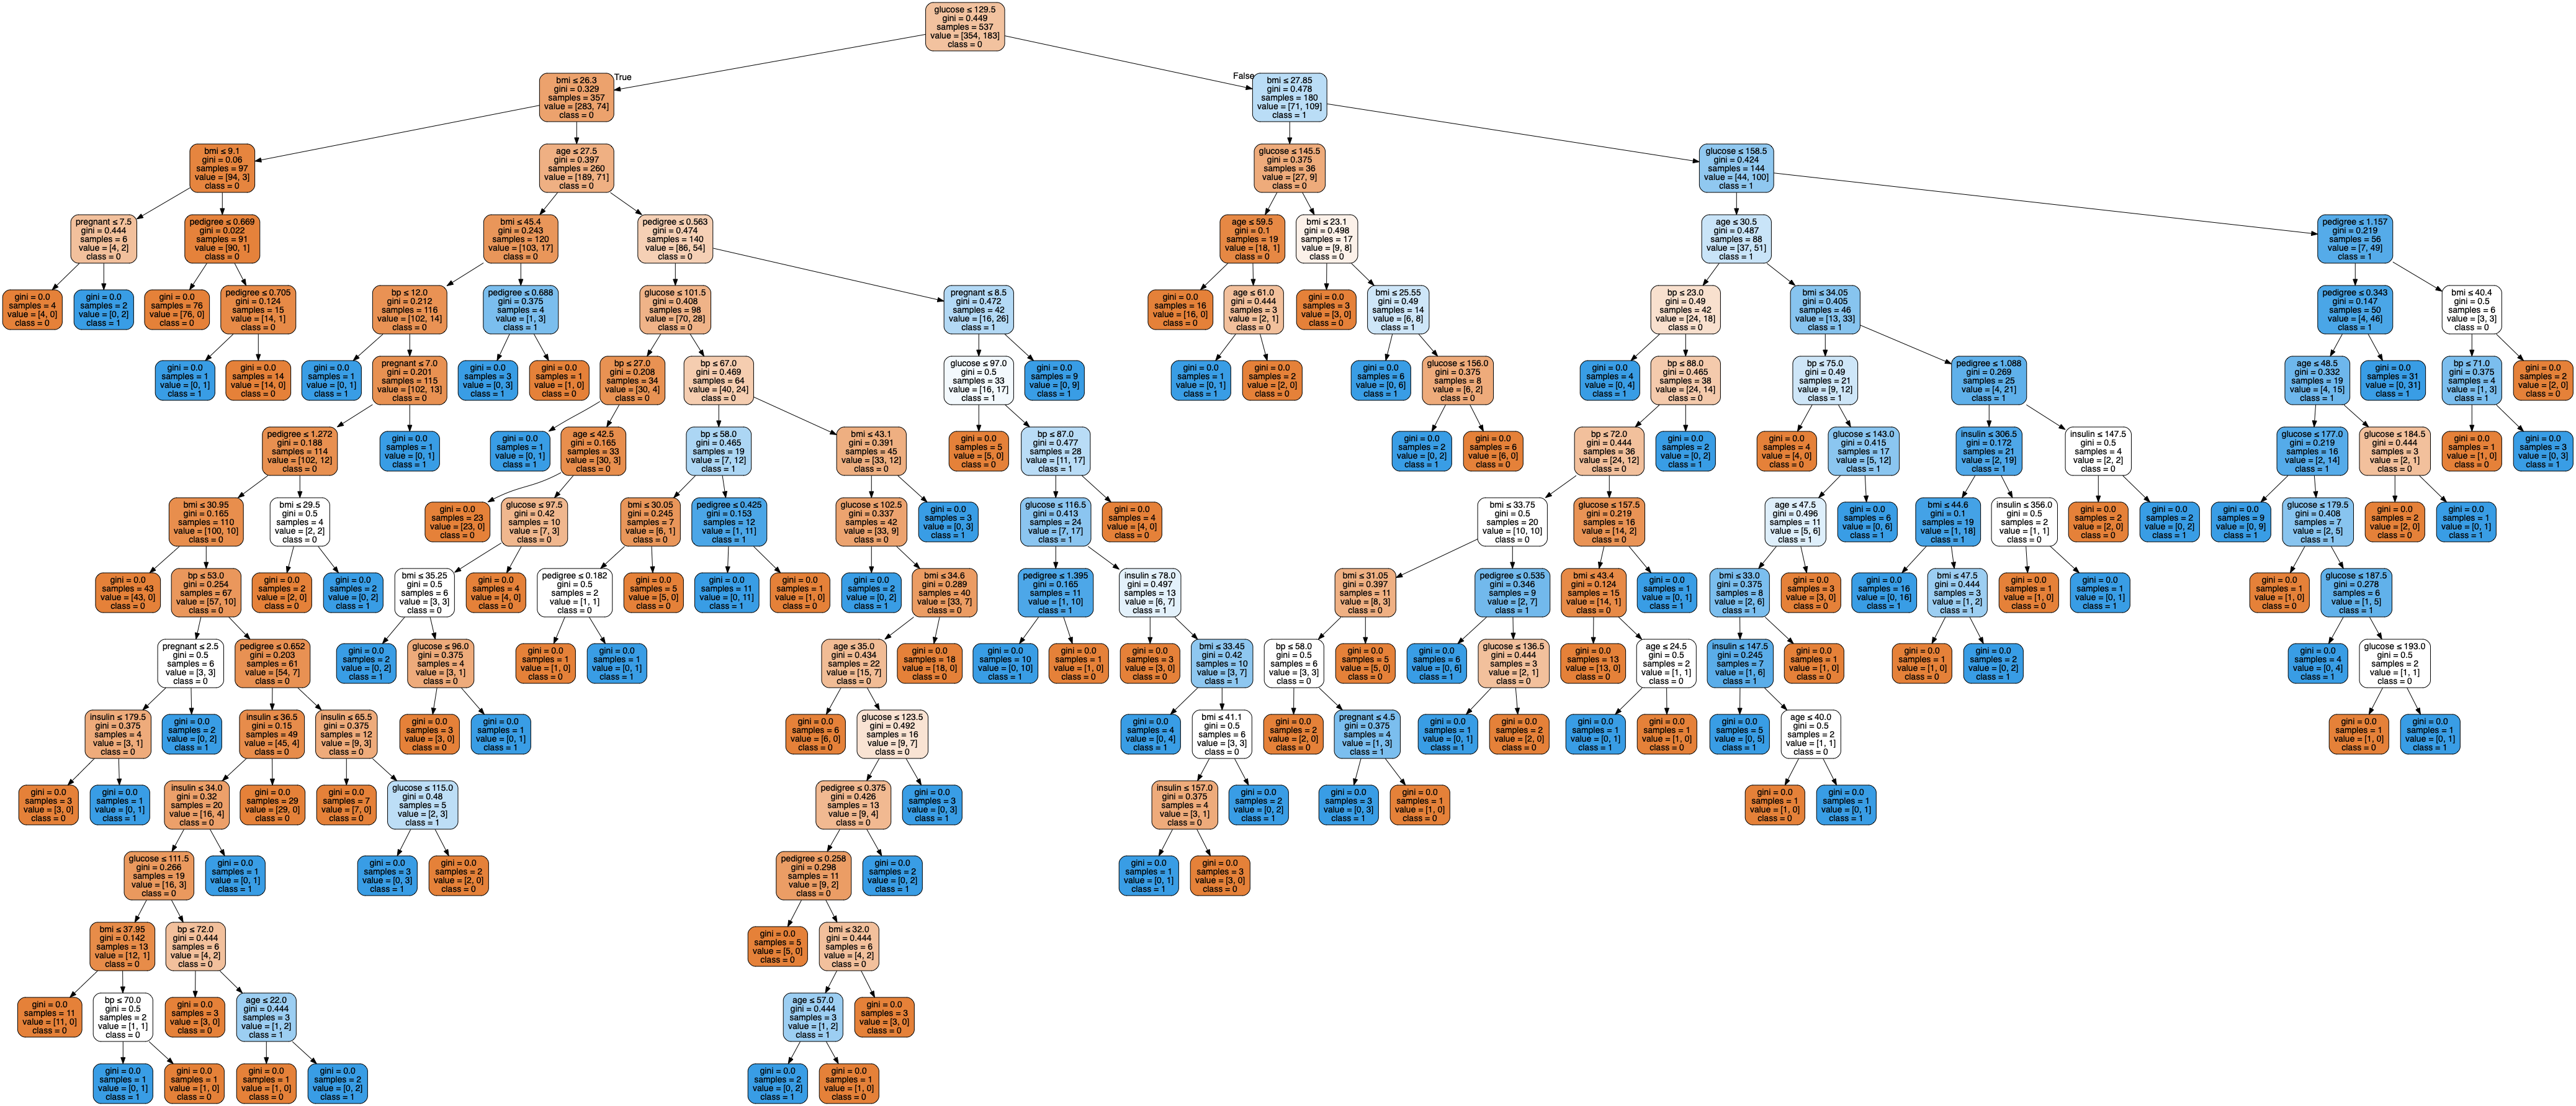

In [9]:
#Visualisation of the above results & draw the decision tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())